___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

## Business Understanding

**RFM Customer Segmentation & Cohort Analysis**. 

Using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository for exploratory data analysis, ***Customer Segmentation***, ***RFM Analysis***, ***K-Means Clustering*** and ***Cohort Analysis*** will be performed.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Info about features are as follows:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.




## 1. Data Cleaning & Exploratory Data Analysis

### Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [8]:
# Let's first check for any duplicate records
print(f'Duplicate items in this dataset is: {df.duplicated().sum()}')

Duplicate items in this dataset is: 5268


In [9]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [10]:
# Drop duplicate records
# df = df[~df.duplicated()]
# df.shape

In [11]:
print('Number of unique Invoice No: {}'.format(len(df.InvoiceNo.unique())))
print('Number of unique StockCode: {}'.format(len(df.StockCode.unique())))
print('Number of different Description: {}'.format(len(df.Description.unique())))
print('Number of unique Customer Id: {}'.format(len(df.CustomerID.unique())))
print('Number of different Countries: {}'.format(len(df.Country.unique())))

Number of unique Invoice No: 25900
Number of unique StockCode: 4070
Number of different Description: 4224
Number of unique Customer Id: 4373
Number of different Countries: 38


In [12]:
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

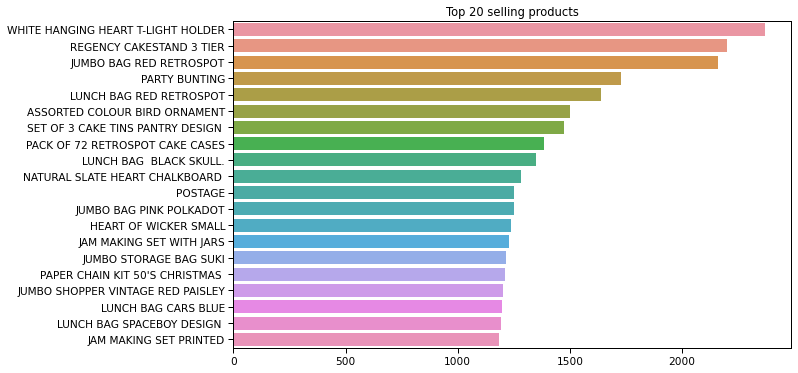

In [13]:
top_prod = df['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.2)
sns.barplot(y = top_prod.index,
            x = top_prod.values)
plt.title("Top 20 selling products")
plt.show();

In [14]:
# Try to sort each item based on their total quantity
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039
WHITE HANGING HEART T-LIGHT HOLDER,35317
RABBIT NIGHT LIGHT,30680
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26315


In [15]:
# Total price for each unique item sold
df["TotalPrice"] = df["Quantity"]*df["UnitPrice"] 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Cancelled Items

In [16]:
df['InvoiceNo'].nunique()

25900

In [17]:
# To find out cancelled sales, invoices having 'C' at the start are the returns
df[df.InvoiceNo.str.contains("C", na = False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [18]:
df[df.InvoiceNo.str.contains("C", na = False)].count()

InvoiceNo      9288
StockCode      9288
Description    9288
Quantity       9288
InvoiceDate    9288
UnitPrice      9288
CustomerID     8905
Country        9288
TotalPrice     9288
dtype: int64

In [19]:
df[df['InvoiceNo'].str.contains("C") == True]['CustomerID'].nunique()

1589

In [20]:
df['CustomerID'].nunique()

4372

In [21]:
df[df['InvoiceNo'].str.contains("C") == True]['CustomerID'].nunique() / df['CustomerID'].nunique() * 100

36.34492223238792

9288 or about 36% of the orders were cancelled.

In [22]:
# To find out the items having the most money refunded
df[df.InvoiceNo.str.contains("C", na = False)].groupby("Description").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = True).head(10)

,TotalPrice
Description,
AMAZON FEE,-235281.59
"PAPER CRAFT , LITTLE BIRDIE",-168469.60
Manual,-146784.46
MEDIUM CERAMIC TOP STORAGE JAR,-77479.64
POSTAGE,-11871.24
REGENCY CAKESTAND 3 TIER,-9722.55
CRUK Commission,-7933.43
Bank Charges,-7340.64
WHITE HANGING HEART T-LIGHT HOLDER,-6624.30


In [23]:
df[df.InvoiceNo.str.contains("C", na = False)].groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = True).head(10)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",-80995
MEDIUM CERAMIC TOP STORAGE JAR,-74494
ROTATING SILVER ANGELS T-LIGHT HLDR,-9376
Manual,-4066
FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150
PINK BLUE FELT CRAFT TRINKET BOX,-2617
WHITE HANGING HEART T-LIGHT HOLDER,-2578
GIN + TONIC DIET METAL SIGN,-2030
HERB MARKER BASIL,-1527


In [24]:
canceled_orders = df[df['InvoiceNo'].str.contains("C") == True]
canceled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [25]:
df.drop(canceled_orders.index, axis=0, inplace=True)

In [26]:
df.shape

(532621, 9)

In [27]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06


In [28]:
df.drop([299983, 299984], axis=0, inplace=True)
df.shape

(532619, 9)

### Handling Missing Values

In [29]:
def missing_values(df):
        mis_val = df.isnull().sum()        
        mis_val_percent = 100 * df.isnull().sum() / len(df)        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)        
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})        
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)        
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"+"There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")        
        return mis_val_table_ren_columns
    
missing_values(df)

Dataframe has 9 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CustomerID,134695,25.3
Description,1454,0.3


In [30]:
df= df.dropna(subset=['CustomerID', 'Description'])
df.shape

(397924, 9)

### Explore Customers by Country

In [31]:
df["Country"].value_counts().head()

United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Name: Country, dtype: int64

In [32]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False).head()

,TotalPrice
Country,
United Kingdom,7308392
Netherlands,285446
EIRE,265546
Germany,228867
France,209024


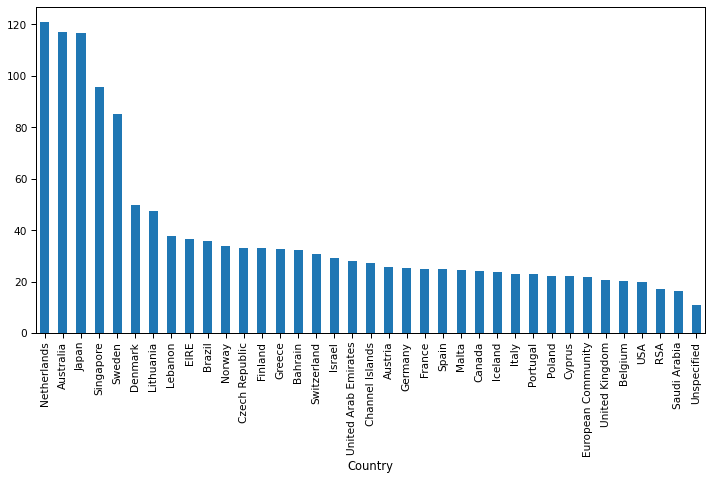

In [33]:
plt.figure(figsize=(12,6))
(df.groupby('Country')['TotalPrice'].sum() / df.groupby('Country')['CustomerID'].count()).sort_values(ascending=False).plot(kind='bar');

#### The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.

### Selecting and Exploring the UK Market


In [34]:
df_uk = df[df.Country == 'United Kingdom']
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


In [35]:
df_uk.shape

(354345, 9)

In [36]:
df_uk.groupby('InvoiceNo')['TotalPrice', 'Quantity'].sum().sort_values(by='TotalPrice',ascending=False).head()

,TotalPrice,Quantity
InvoiceNo,,
581483,168470,80995
541431,77184,74215
556444,38970,60
567423,31698,12572
572209,22206,1920


2. What are the most popular products that are bought in the UK?

In [37]:
df_uk["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    1940
JUMBO BAG RED RETROSPOT               1464
REGENCY CAKESTAND 3 TIER              1426
ASSORTED COLOUR BIRD ORNAMENT         1333
PARTY BUNTING                         1308
Name: Description, dtype: int64

In [38]:
df_uk.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head(10)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,76919
WORLD WAR 2 GLIDERS ASSTD DESIGNS,49182
JUMBO BAG RED RETROSPOT,41981
WHITE HANGING HEART T-LIGHT HOLDER,34648
ASSORTED COLOUR BIRD ORNAMENT,32727
POPCORN HOLDER,28935
PACK OF 12 LONDON TISSUES,24337
BROCADE RING PURSE,22711


# 2. RFM Analysis

In the age of the internet and e-commerce, companies that do not expand their businesses online or utilize digital tools to reach their customers will run into issues like scalability and a lack of digital precsence. An important marketing strategy e-commerce businesses use for analyzing and predicting customer value is customer segmentation. Customer data is used to sort customers into group based on their behaviors and preferences.

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.
<br>
<br>
Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with predictive analysis using **K-Means Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value




Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?
 

In [39]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [41]:
df_uk['InvoiceDate'].sort_values()

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541879   2011-12-09 12:31:00
541892   2011-12-09 12:49:00
541890   2011-12-09 12:49:00
541891   2011-12-09 12:49:00
541893   2011-12-09 12:49:00
Name: InvoiceDate, Length: 354345, dtype: datetime64[ns]

In [42]:
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate']) 

In [43]:
df_uk['InvoiceDate'].dtype

dtype('<M8[ns]')

In [44]:
# Lets see the last date available in our dataset
df_uk['InvoiceDate'] = df_uk['InvoiceDate'].dt.date
today_date = df_uk['InvoiceDate'].max()
today_date

datetime.date(2011, 12, 9)

In [45]:
rfm = df_uk.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (today_date - x.max()).days,'InvoiceNo': 'nunique','TotalPrice': 'sum'})
rfm.rename(columns={'InvoiceDate': 'Recency','InvoiceNo': 'Frequency','TotalPrice': 'Monetary'}, inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77184
12747,2,11,4196
12748,0,210,33720
12749,3,5,4091
12820,3,4,942


In [46]:
df_uk['InvoiceNo'].nunique()

16649

In [47]:
df_uk[df_uk['CustomerID'] == 12747]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
9754,537215,85124C,GREEN JUICY FRUIT PHOTO FRAME,12,2010-12-05,3,12747,United Kingdom,31
9755,537215,85124B,BLUE JUICY FRUIT PHOTO FRAME,6,2010-12-05,3,12747,United Kingdom,15
9756,537215,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-05,2,12747,United Kingdom,27
9757,537215,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,24,2010-12-05,2,12747,United Kingdom,40
9758,537215,85064,CREAM SWEETHEART LETTER RACK,6,2010-12-05,5,12747,United Kingdom,33
...,...,...,...,...,...,...,...,...,...
534568,581163,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,24,2011-12-07,2,12747,United Kingdom,40
534569,581163,23581,JUMBO BAG PAISLEY PARK,10,2011-12-07,2,12747,United Kingdom,21
534570,581163,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-07,3,12747,United Kingdom,18
534571,581163,82494L,WOODEN FRAME ANTIQUE WHITE,24,2011-12-07,3,12747,United Kingdom,61


In [48]:
df[df['CustomerID'] == 12747]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
9754,537215,85124C,GREEN JUICY FRUIT PHOTO FRAME,12,2010-12-05 15:38:00,3,12747,United Kingdom,31
9755,537215,85124B,BLUE JUICY FRUIT PHOTO FRAME,6,2010-12-05 15:38:00,3,12747,United Kingdom,15
9756,537215,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-05 15:38:00,2,12747,United Kingdom,27
9757,537215,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,24,2010-12-05 15:38:00,2,12747,United Kingdom,40
9758,537215,85064,CREAM SWEETHEART LETTER RACK,6,2010-12-05 15:38:00,5,12747,United Kingdom,33
...,...,...,...,...,...,...,...,...,...
534568,581163,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,24,2011-12-07 14:34:00,2,12747,United Kingdom,40
534569,581163,23581,JUMBO BAG PAISLEY PARK,10,2011-12-07 14:34:00,2,12747,United Kingdom,21
534570,581163,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-07 14:34:00,3,12747,United Kingdom,18
534571,581163,82494L,WOODEN FRAME ANTIQUE WHITE,24,2011-12-07 14:34:00,3,12747,United Kingdom,61


In [49]:
df_uk[df_uk['CustomerID'] == 12748]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1016,536521,22854,CREAM SWEETHEART EGG HOLDER,1,2010-12-01,5,12748,United Kingdom,5
3692,536641,22187,GREEN CHRISTMAS TREE CARD HOLDER,1,2010-12-02,4,12748,United Kingdom,4
8448,537136,20894,HANGING BAUBLE T-LIGHT HOLDER LARGE,1,2010-12-05,3,12748,United Kingdom,3
8449,537136,85018D,YULETIDE IMAGES S/6 PAPER BOXES,1,2010-12-05,3,12748,United Kingdom,3
8450,537136,21413,PERIWINKLE T-LIGHT HOLDER,1,2010-12-05,1,12748,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
541855,581580,21351,CINAMMON & ORANGE WREATH,1,2011-12-09,7,12748,United Kingdom,7
541856,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-12-09,3,12748,United Kingdom,3
541857,581580,22567,20 DOLLY PEGS RETROSPOT,1,2011-12-09,1,12748,United Kingdom,1
541858,581580,79321,CHILLI LIGHTS,2,2011-12-09,6,12748,United Kingdom,12


### Creating R, F, and M Scores

In [50]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1]) 
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method = 'first'), 5, labels = [1, 2, 3, 4, 5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346,325,1,77184,1,1,5
12747,2,11,4196,5,5,5
12748,0,210,33720,5,5,5
12749,3,5,4091,5,4,5
12820,3,4,942,5,4,4


In [51]:
# To creat a new variable (RFM_SCORE) by combining all these rfm scores into string
rfm["RFM_Score"] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
CustomerID,,,,,,,
12346,325,1,77184,1,1,5,115
12747,2,11,4196,5,5,5,555
12748,0,210,33720,5,5,5,555
12749,3,5,4091,5,4,5,545
12820,3,4,942,5,4,4,544


In [52]:
rfm['RFM_Total'] = rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].sum(axis=1)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_Total
CustomerID,,,,,,,,
12346,325,1,77184,1,1,5,115,7
12747,2,11,4196,5,5,5,555,15
12748,0,210,33720,5,5,5,555,15
12749,3,5,4091,5,4,5,545,14
12820,3,4,942,5,4,4,544,13


### Segmentation based on RFM Scores

In [53]:
# Name the customer segmentation based on the characteristics in the following grid
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

# Create new variable named 'Segment' by using regex (regular expressions operations)
rfm['RFM_Score_Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['RFM_Score_Segment'] = rfm['RFM_Score_Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_Total,RFM_Score_Segment
CustomerID,,,,,,,,,
12346,325,1,77184,1,1,5,115,7,Hibernating
12747,2,11,4196,5,5,5,555,15,Champions
12748,0,210,33720,5,5,5,555,15,Champions
12749,3,5,4091,5,4,5,545,14,Champions
12820,3,4,942,5,4,4,544,13,Champions


In [54]:
rfm.isnull().sum()

Recency              0
Frequency            0
Monetary             0
RecencyScore         0
FrequencyScore       0
MonetaryScore        0
RFM_Score            0
RFM_Total            0
RFM_Score_Segment    0
dtype: int64

In [55]:
# According to segment, looking at the mean and the number of recency, frequency, and monatery scores
rfm[["RFM_Score_Segment", "Recency","Frequency","Monetary"]].groupby("RFM_Score_Segment").agg(["mean","count"])

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
RFM_Score_Segment                                               
About to Sleep           52   324         1   324      431   324
At Risk                 153   532         3   532     1061   532
Can't Loose             131    59         9    59     2841    59
Champions                 5   577        12   577     6140   577
Hibernating             216   964         1   964      435   964
Loyal Customers          33   730         6   730     2508   730
Need Attention           51   170         2   170      835   170
New Customers             7    38         1    38      375    38
Potential Loyalists      16   440         2   440     1056   440
Promising                23    87         1    87      262    87

In [56]:
df_Segment = rfm.groupby('RFM_Score_Segment', as_index=False).agg({'Recency':'mean', 'Frequency':'mean', 'Monetary':'mean'})
df_Segment.columns = ['RFM_Score_Segment','Recency', 'Frequency', 'Monetary']
df_Segment

,RFM_Score_Segment,Recency,Frequency,Monetary
0,About to Sleep,52,1,431
1,At Risk,153,3,1061
2,Can't Loose,131,9,2841
3,Champions,5,12,6140
4,Hibernating,216,1,435
5,Loyal Customers,33,6,2508
6,Need Attention,51,2,835
7,New Customers,7,1,375
8,Potential Loyalists,16,2,1056
9,Promising,23,1,262


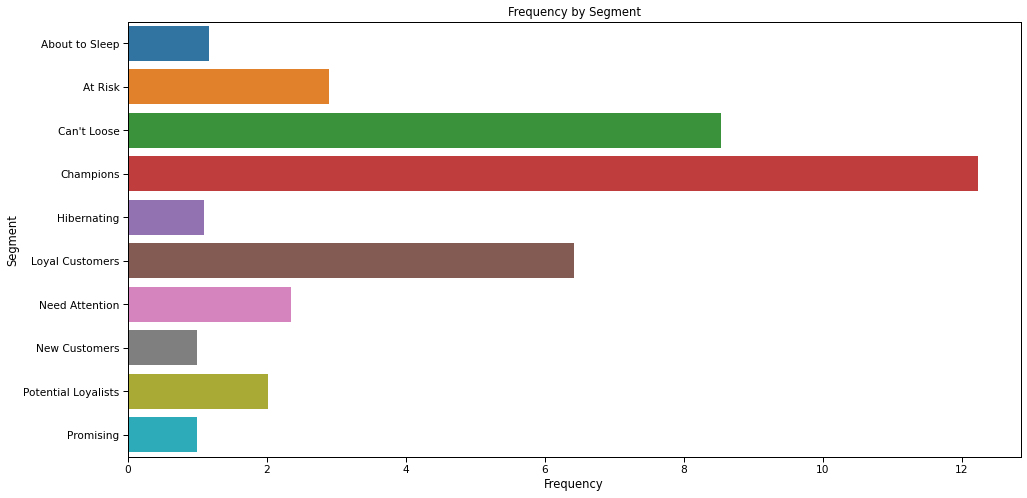

In [57]:
plt.figure(figsize = (16,8))
ax = sns.barplot(x="Frequency", y="RFM_Score_Segment", data=df_Segment)
ax.set_ylabel('Segment')
ax.set_title('Frequency by Segment');

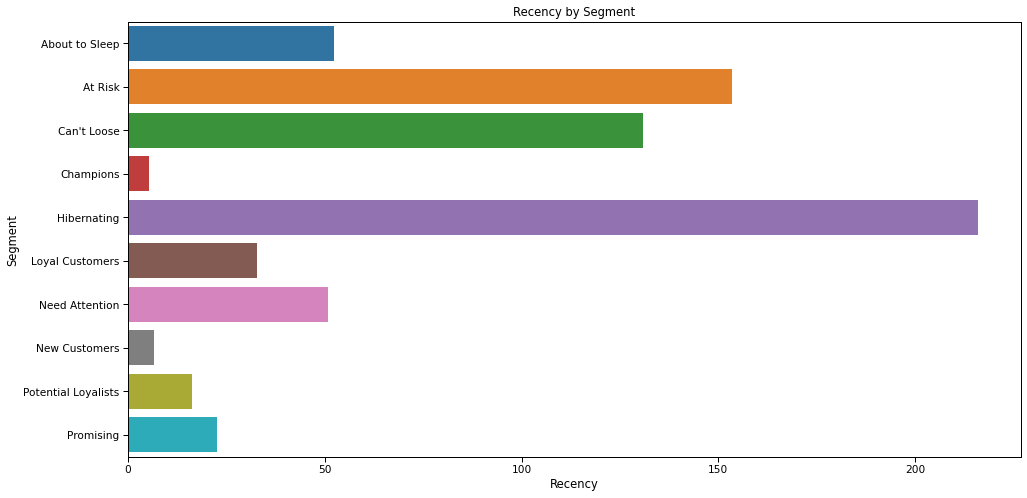

In [58]:
plt.figure(figsize = (16,8))
ax = sns.barplot(x="Recency", y="RFM_Score_Segment", data=df_Segment)
ax.set_ylabel('Segment')
ax.set_title('Recency by Segment');

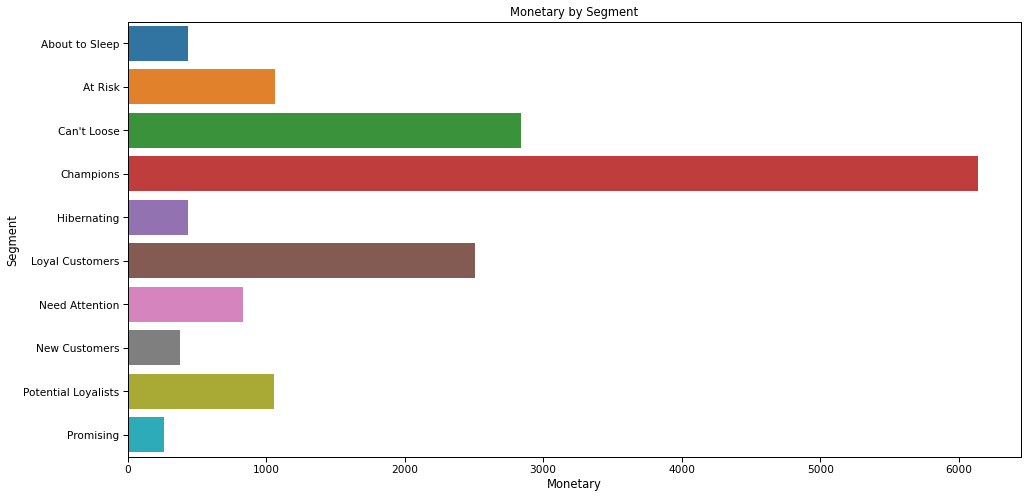

In [59]:
plt.figure(figsize = (16,8))
ax = sns.barplot(x="Monetary", y="RFM_Score_Segment", data=df_Segment)
ax.set_ylabel('Segment')
ax.set_title('Monetary by Segment');

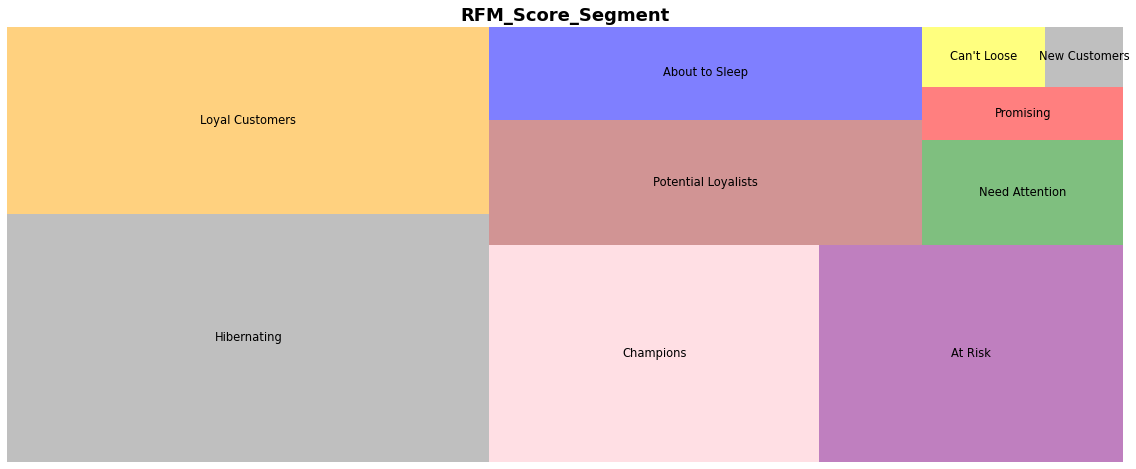

In [60]:
!pip install squarify
import squarify

squarity =rfm['RFM_Score_Segment'].value_counts()
color=['grey','orange','pink','purple', 'brown', 'blue', 'green', 'red', 'yellow']


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,8)
squarify.plot(sizes= squarity, 
              label=['Hibernating',
                     'Loyal Customers',
                     'Champions',
                     'At Risk',
                     'Potential Loyalists',
                     'About to Sleep',
                     'Need Attention',
                     'Promising',
                     "Can't Loose",
                    'New Customers'] ,color = color, alpha=0.5,)
plt.title("RFM_Score_Segment",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show();

In [61]:
df_Segment.sort_values(by = 'Recency')

,RFM_Score_Segment,Recency,Frequency,Monetary
3,Champions,5,12,6140
7,New Customers,7,1,375
8,Potential Loyalists,16,2,1056
9,Promising,23,1,262
5,Loyal Customers,33,6,2508
6,Need Attention,51,2,835
0,About to Sleep,52,1,431
2,Can't Loose,131,9,2841
1,At Risk,153,3,1061
4,Hibernating,216,1,435


**New Customers**

These are the customers spent a lot on their first purchases. 
Their mean score of recency is just 7 days and average amount of money they spent is £371. 
it’s very important to make them feel valued and appreciated. 
It would be a good idea to give them some incentives to make them continue interacting with the products we are selling.

**Need Attention**

These are our core customers whose last purchase happened more than one month ago (mean of recency = 51 days).
Offering coupons would be a great idea to bring more them back to the platform and keep them engaged as much as possible.

**Can't Loose**

After champions, these are the ones having the mean frequency and monetary the highest. The problem with this group is its recency values. More than four months have been past since their last purchase. Therefore, We need to find a way to make them feel valued and appreciated. It would be a good idea to give them some incentives to make them continue interacting with the products we are selling. Specific discount coupons could be delivered to them on a specific intervals. 

### Segmentation based on RFM Total

In [62]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_Total,RFM_Score_Segment
CustomerID,,,,,,,,,
12346,325,1,77184,1,1,5,115,7,Hibernating
12747,2,11,4196,5,5,5,555,15,Champions
12748,0,210,33720,5,5,5,555,15,Champions
12749,3,5,4091,5,4,5,545,14,Champions
12820,3,4,942,5,4,4,544,13,Champions


In [63]:
def rfm_label(df):
        
    if (df['RecencyScore'] == 4) and (df['FrequencyScore'] == 4) and (3 <= df['MonetaryScore'] <= 4):
        return 'Best Customer'
    elif (df['FrequencyScore'] == 4) and (3 <= df['RecencyScore'] <= 4) and (3 <= df['MonetaryScore'] <= 4):
        return 'Loyal Customer'
    elif (df['MonetaryScore'] == 4) and (3 <= df['RecencyScore'] <= 4) and (3 <= df['FrequencyScore'] <= 4):
        return 'Big Spender'
    elif (df['RecencyScore'] == 2) and (2 <= df['FrequencyScore'] <= 3) and (2 <= df['MonetaryScore'] <= 3):
        return 'Almost Lost'
    elif (df['RecencyScore'] == 1) and (2 <= df['FrequencyScore'] <= 3) and (2 <= df['MonetaryScore'] <= 3):
        return 'Lost Customer'
    elif (df['RecencyScore'] == 1) and (df['FrequencyScore'] == 1) and (df['MonetaryScore'] == 1):
        return 'Lost Cheap Customer'  
    elif df['RFM_Total'] >= 11:
        return 'Best Customer'
    elif (9 <= df['RFM_Total'] <= 10):
        return 'Loyal Customer'
    elif (6 <= df['RFM_Total'] <= 8):
        return 'Almost Lost'
    else:
        return 'Lost Customer'


   
rfm['RFM_Total_Segment'] = rfm.apply(rfm_label, axis=1)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_Total,RFM_Score_Segment,RFM_Total_Segment
CustomerID,,,,,,,,,,
12346,325,1,77184,1,1,5,115,7,Hibernating,Almost Lost
12747,2,11,4196,5,5,5,555,15,Champions,Best Customer
12748,0,210,33720,5,5,5,555,15,Champions,Best Customer
12749,3,5,4091,5,4,5,545,14,Champions,Best Customer
12820,3,4,942,5,4,4,544,13,Champions,Best Customer


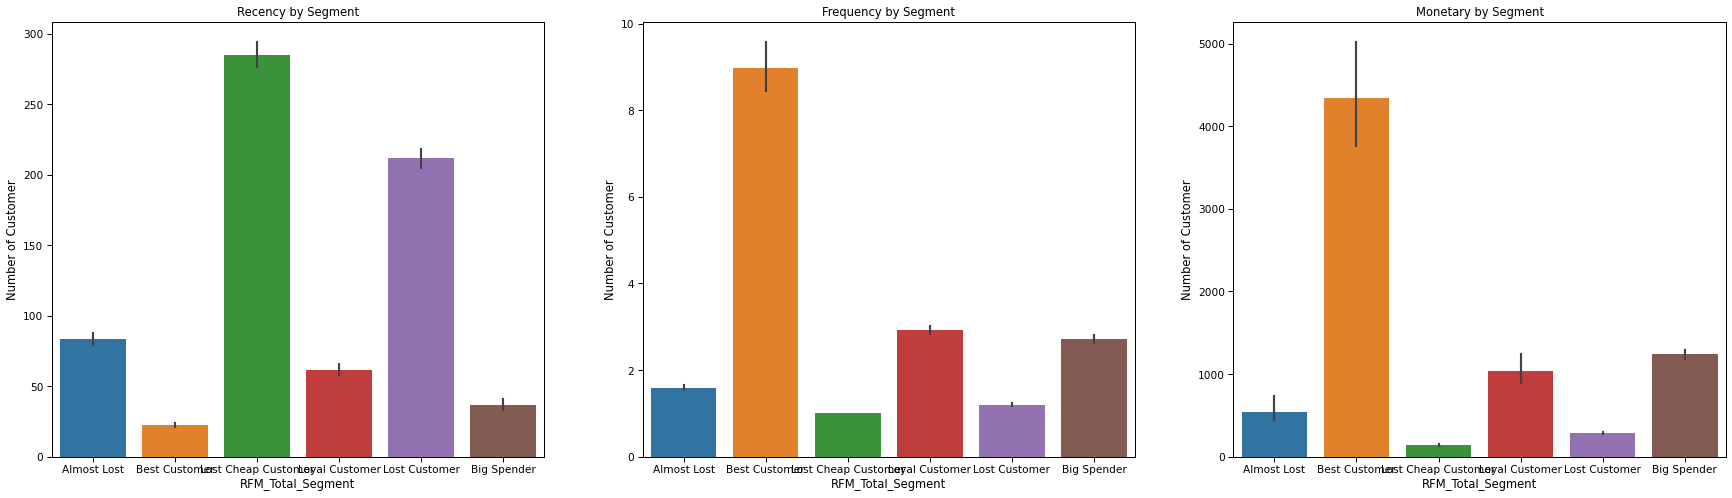

In [64]:
plt.figure(figsize = (30,8))

plt.subplot(1,3,1)
ax = sns.barplot(x="RFM_Total_Segment", y="Recency", data=rfm)
ax.set_ylabel('Number of Customer')
ax.set_title('Recency by Segment')

plt.subplot(1,3,2)
ax = sns.barplot(x="RFM_Total_Segment", y="Frequency", data=rfm)
ax.set_ylabel('Number of Customer')
ax.set_title('Frequency by Segment')

plt.subplot(1,3,3)
ax = sns.barplot(x="RFM_Total_Segment", y="Monetary", data=rfm)
ax.set_ylabel('Number of Customer')
ax.set_title('Monetary by Segment');

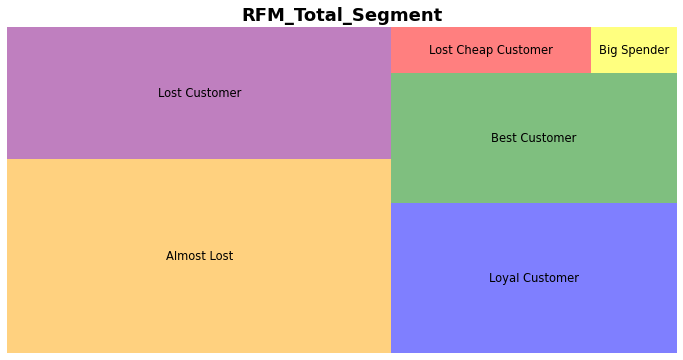

In [65]:
squarity =rfm['RFM_Total_Segment'].value_counts()
color=['orange','purple', 'blue', 'green', 'red', 'yellow']


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12,6)
squarify.plot(sizes= squarity, 
              label=['Almost Lost',
                     'Lost Customer',
                     'Loyal Customer',
                     'Best Customer',
                     'Lost Cheap Customer',
                     'Big Spender'] ,color = color, alpha=0.5,)
plt.title("RFM_Total_Segment",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show();

# 3. Applying K-Means Clustering

### Data Pre-Processing and Exploring

In [66]:
rfm_clust = rfm[['Recency', 'Frequency','Monetary']]
rfm_clust.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77184
12747,2,11,4196
12748,0,210,33720
12749,3,5,4091
12820,3,4,942


In [67]:
rfm_clust.isnull().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

### Define and Plot Feature Correlations

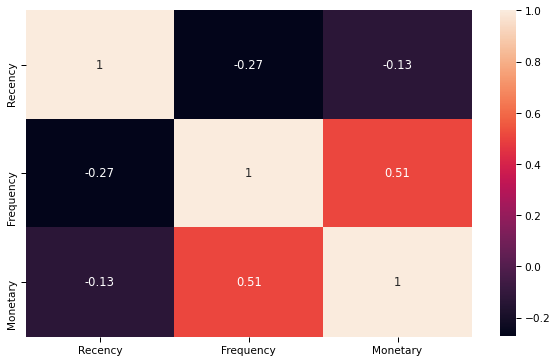

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(rfm_clust.corr(),annot=True);

### Visualize Feature Distributions

To get a better understanding of the dataset, you can costruct a scatter matrix of each of the three features in the RFM data.

<Figure size 1152x864 with 0 Axes>

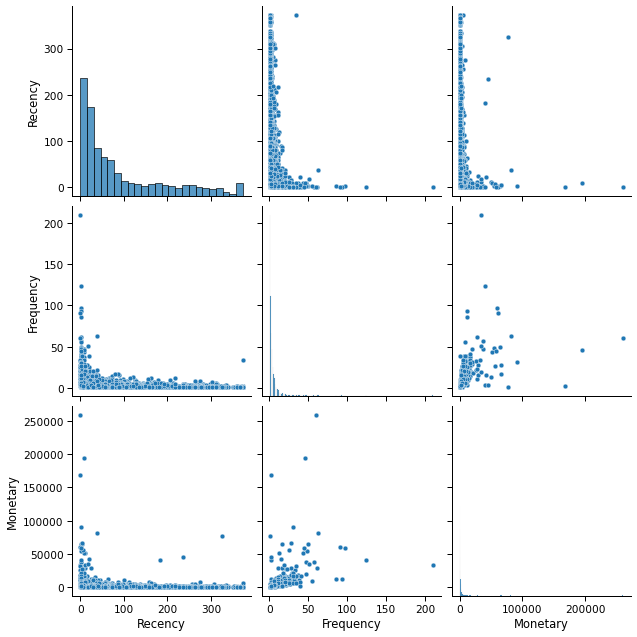

In [69]:
plt.figure(figsize=(16,12))
sns.pairplot(rfm_clust,height=3)
plt.show();

### Hopkins Test
Assess the clusterability of a dataset. 
A score between 0 and 1, a score around 0.5 express no clusterability and
a score tending to 0 express a high cluster tendency.

In [70]:
from pyclustertend import hopkins
hopkins(rfm_clust, rfm_clust.shape[0])

0.004462746196737303

### Data Normalization

In [71]:
rfm_cluster = rfm_clust.copy()

In [72]:
rfm_cluster['Recency']=np.log1p(rfm_cluster['Recency'])
rfm_cluster['Frequency']=np.log1p(rfm_cluster['Frequency'])
rfm_cluster['Monetary']=np.log1p(rfm_cluster['Monetary'])
rfm_cluster.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,6,1,11
12747,1,2,8
12748,0,5,10
12749,1,2,8
12820,1,2,7


2. Plot normalized data with scatter matrix or pairplot. Also evaluate results.

<Figure size 1152x864 with 0 Axes>

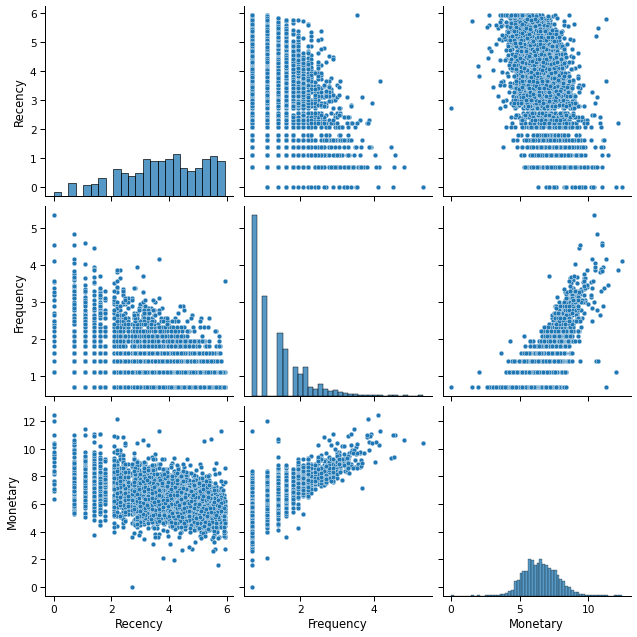

In [73]:
plt.figure(figsize=(16,12))
sns.pairplot(rfm_cluster,height=3)
plt.show();

### K-Means Implementation

K-means is sensitive to initializations because they are critical to qualifty of optima found. Thus, we will use smart initialization called "Elbow Method".

### Define the Optimal Number of Clusters

[The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

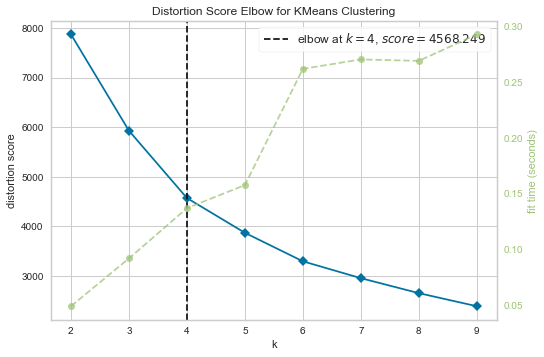

In [74]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(rfm_cluster)
visu.poof();

### Silhoutte Score
Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means.

The value of the Silhouette score ranges from -1 to 1. 

If the Silhouette score is close 1, it means that the cluster is dense and well-separated than other clusters. 

In [76]:
from sklearn.metrics import silhouette_samples,silhouette_score
ssd =[]
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(rfm_cluster)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(rfm_cluster, model.labels_)}')

Silhouette Score for 2 clusters: 0.41994200270610293
Silhouette Score for 3 clusters: 0.3359641800509768
Silhouette Score for 4 clusters: 0.35244934853840926
Silhouette Score for 5 clusters: 0.33794709034459514
Silhouette Score for 6 clusters: 0.3261971183804162
Silhouette Score for 7 clusters: 0.31702170682080594
Silhouette Score for 8 clusters: 0.32154653450176096
Silhouette Score for 9 clusters: 0.30775451445491586


### Model Fitting

Fit the K-Means Algorithm with the optimal number of clusters you decided and save the model to disk.

In [77]:
k_means1 =KMeans(n_clusters=4).fit(rfm_cluster)
labels1 = k_means1.labels_
rfm_cluster['cluster_id'] = labels1
rfm_cluster.head()

,Recency,Frequency,Monetary,cluster_id
CustomerID,,,,
12346,6,1,11,1
12747,1,2,8,3
12748,0,5,10,3
12749,1,2,8,3
12820,1,2,7,3


### Visualize the Clusters

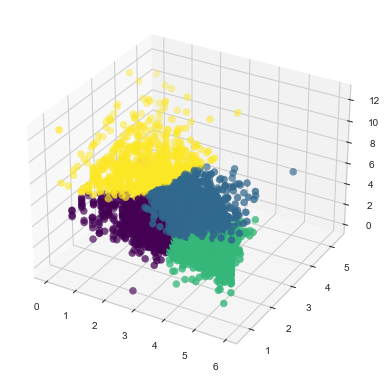

In [78]:
from mpl_toolkits.mplot3d import Axes3D

clusters= k_means1.labels_
centers = k_means1.cluster_centers_

plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(rfm_cluster.iloc[:,0],rfm_cluster.iloc[:,1],rfm_cluster.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="o",s = 200);

In [79]:
import plotly.graph_objs as go
import plotly as py
py.offline.init_notebook_mode(connected = True)
rfm_cluster['cluster_id'] =  k_means1.labels_
trace1 = go.Scatter3d(
    x = rfm_cluster['Recency'],
    y = rfm_cluster['Frequency'],
    z = rfm_cluster['Monetary'],
    mode ='markers',
    marker = dict(color = rfm_cluster['cluster_id'], size = 6, line = dict(color= rfm_cluster['cluster_id'], width= 12), opacity = 0.8)) 
data = [trace1]
layout = go.Layout(title= 'Customers Segmentation', scene = dict(xaxis = dict(title  = 'Recency'), yaxis = dict(title  = 'Frequency'), zaxis = dict(title  = 'Monetary')))
fig = go.Figure(data = data, layout=layout)
py.offline.iplot(fig)
plt.show();

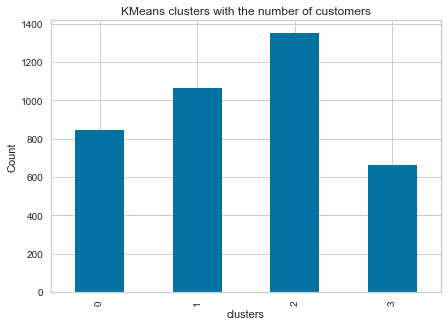

In [80]:
plt.title("KMeans clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
rfm_cluster.cluster_id.value_counts().plot(kind='bar');

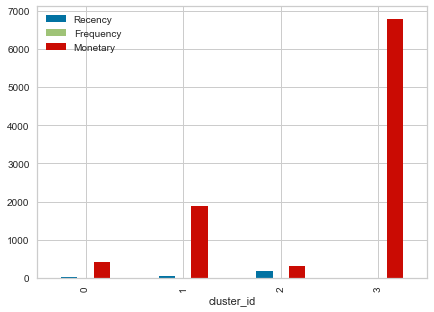

In [81]:
rfm_clust.groupby(rfm_cluster.cluster_id).mean().plot(kind='bar')
plt.show();

2. Visualize Cluster Id vs Recency, Cluster Id vs Frequency and Cluster Id vs Monetary using Box plot. Also evaluate the results. 

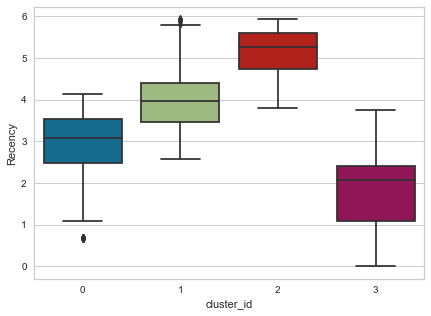

In [82]:
sns.boxplot(x='cluster_id', y ='Recency',data = rfm_cluster);

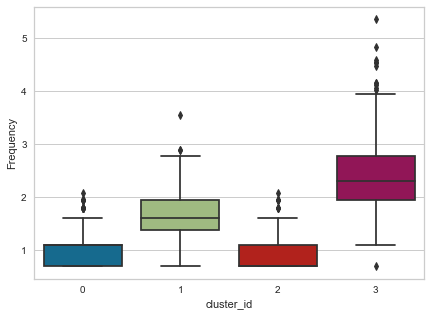

In [83]:
sns.boxplot(x='cluster_id', y ='Frequency',data = rfm_cluster);

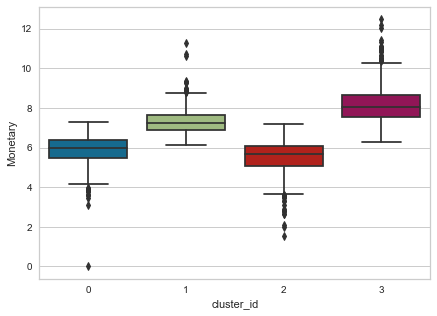

In [84]:
sns.boxplot(x='cluster_id', y ='Monetary',data = rfm_cluster);

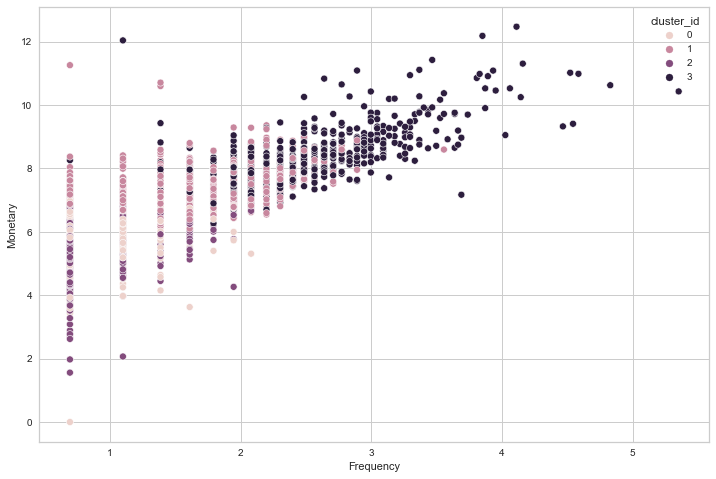

In [85]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = rfm_cluster, x='Frequency', y='Monetary', hue='cluster_id');

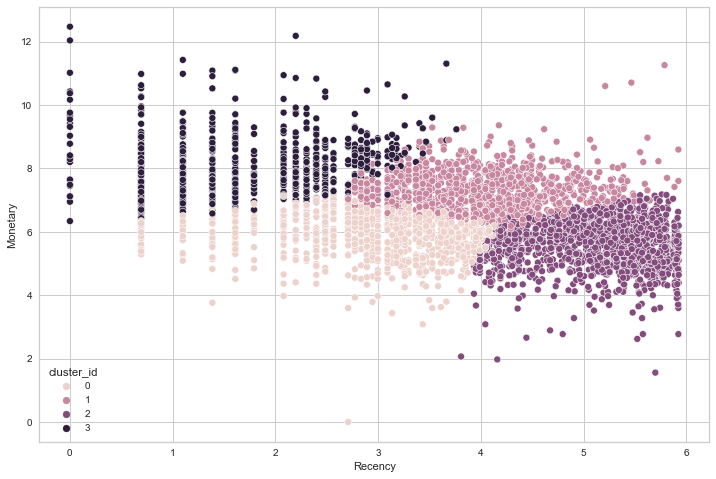

In [86]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = rfm_cluster, x='Recency', y='Monetary', hue='cluster_id');

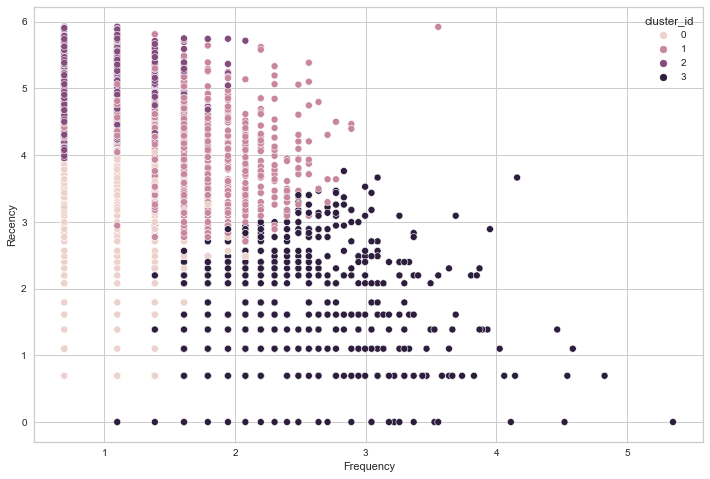

In [87]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = rfm_cluster, x='Frequency', y='Recency', hue='cluster_id');

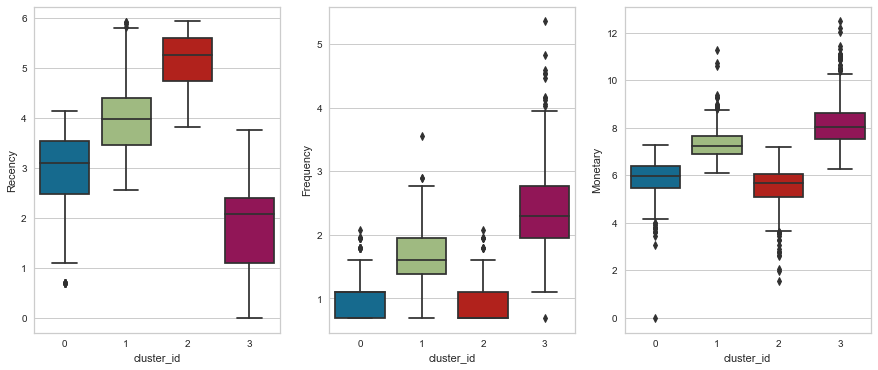

In [88]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(rfm_cluster['cluster_id'], rfm_cluster['Recency'])

plt.subplot(1,3,2)
sns.boxplot(rfm_cluster['cluster_id'], rfm_cluster['Frequency'])

plt.subplot(1,3,3)
sns.boxplot(rfm_cluster['cluster_id'], rfm_cluster['Monetary'])
plt.show();

In [89]:
rfm_cl = rfm_clust.copy()
rfm_cl.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77184
12747,2,11,4196
12748,0,210,33720
12749,3,5,4091
12820,3,4,942


In [90]:
rfm_cl['cluster_id'] = labels1
rfm_cl.head()

,Recency,Frequency,Monetary,cluster_id
CustomerID,,,,
12346,325,1,77184,1
12747,2,11,4196,3
12748,0,210,33720,3
12749,3,5,4091,3
12820,3,4,942,3


In [91]:
df_cluster = rfm_cl.groupby('cluster_id', as_index=False).agg({'Recency':'mean', 'Frequency':'mean', 'Monetary':'mean'})
df_cluster.columns = ['ClusterID','Recency', 'Frequency', 'Monetary']
df_cluster

,ClusterID,Recency,Frequency,Monetary
0,0,24,2,434
1,1,65,4,1897
2,2,196,1,330
3,3,7,13,6772


#### Assign the Label

In [92]:
df_cluster['ClusterID'] = df_cluster['ClusterID'].replace([0,1,2,3], ['Passer Customers','Potential Loyalists', 'Need Attention', 'Best Customer'])
df_cluster.head()

,ClusterID,Recency,Frequency,Monetary
0,Passer Customers,24,2,434
1,Potential Loyalists,65,4,1897
2,Need Attention,196,1,330
3,Best Customer,7,13,6772


**Need Attention**

These are the ones whose last purchased activitiy happened more than 2 months age, but their monatery contributions are the second highest after the best customers even though their frequecy values are relatively low. These are the ones speinding more when they visit our company. Providing them a special membership cards could make them valuable and permanent customers. 


# 4. Create Cohort & Conduct Cohort Analysis
[Cohort Analysis](https://medium.com/swlh/cohort-analysis-using-python-and-pandas-d2a60f4d0a4d) is specifically useful in analyzing user growth patterns for products. In terms of a product, a cohort can be a group of people with the same sign-up date, the same usage starts month/date, or the same traffic source.
Cohort analysis is an analytics method by which these groups can be tracked over time for finding key insights. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.

For e-commerce organizations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get the following answers to the following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employ to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasonality pattern in Customer behavior?
- Along with various performance measures/metrics for your organization.

## Future Engineering

### Extract the Month of the Purchase
First we will create a function, which takes any date and returns the formatted date with day value as 1st of the same month and Year.

In [93]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3,17850,United Kingdom,20


In [94]:
df_uk.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
TotalPrice     float64
dtype: object

In [95]:
def get_month(x):
    return dt.datetime(x.year,x.month,1) 

df_uk['InvoiceMonth'] = df_uk['InvoiceDate'].apply(get_month) 

df_uk['CohortMonth'] = df_uk.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [96]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,3,17850,United Kingdom,15,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,3,17850,United Kingdom,22,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01


In [97]:
df_uk[df_uk['CustomerID'] == 12830]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth
234640,557571,22536,MAGIC DRAWING SLATE PURDEY,192,2011-06-21,0,12830,United Kingdom,52,2011-06-01,2011-06-01
234641,557571,22535,MAGIC DRAWING SLATE BUNNIES,192,2011-06-21,0,12830,United Kingdom,52,2011-06-01,2011-06-01
234642,557571,22533,MAGIC DRAWING SLATE BAKE A CAKE,192,2011-06-21,0,12830,United Kingdom,52,2011-06-01,2011-06-01
234643,557571,22532,MAGIC DRAWING SLATE LEAP FROG,192,2011-06-21,0,12830,United Kingdom,52,2011-06-01,2011-06-01
234644,557571,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,576,2011-06-21,1,12830,United Kingdom,495,2011-06-01,2011-06-01
234645,557571,21890,S/6 WOODEN SKITTLES IN COTTON BAG,100,2011-06-21,2,12830,United Kingdom,226,2011-06-01,2011-06-01
234646,557571,21891,TRADITIONAL WOODEN SKIPPING ROPE,288,2011-06-21,1,12830,United Kingdom,360,2011-06-01,2011-06-01
234647,557571,22550,HOLIDAY FUN LUDO,72,2011-06-21,3,12830,United Kingdom,189,2011-06-01,2011-06-01
234648,557571,21703,BAG 125g SWIRLY MARBLES,288,2011-06-21,0,12830,United Kingdom,78,2011-06-01,2011-06-01
234649,557571,21912,VINTAGE SNAKES & LADDERS,72,2011-06-21,3,12830,United Kingdom,189,2011-06-01,2011-06-01


### Calculating time offset in Months i.e. Cohort Index:
Calculating time offset for each transaction will allows us to report the metrics for each cohort in a comparable fashion.
First, we will create 4 variables that capture the integer value of years, months for Invoice and Cohort Date using the get_date_int() function which we'll create it below.

In [98]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

invoice_year, invoice_month = get_date_int(df_uk,'InvoiceMonth')
cohort_year, cohort_month = get_date_int(df_uk,'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
df_uk['CohortIndex'] = years_diff * 12 + months_diff + 1
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,3,17850,United Kingdom,15,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,3,17850,United Kingdom,22,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01,1


## Create 1st Cohort: User number & Retention Rate

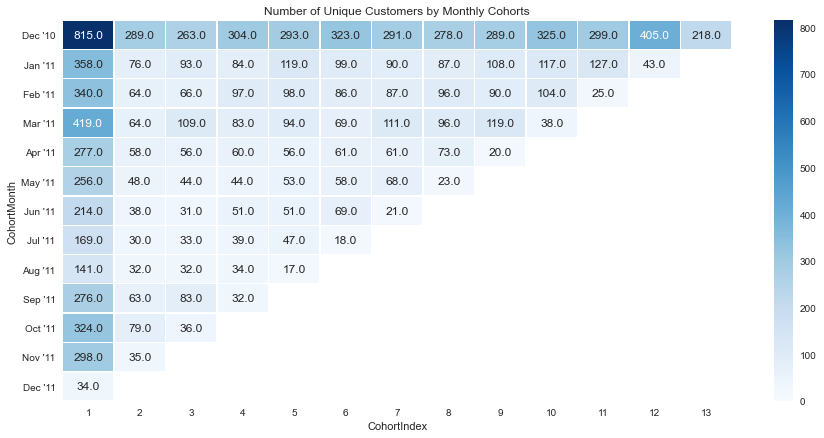

In [105]:
grouping = df_uk.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]


plt.figure(figsize=(15,7))


plt.title('Number of Unique Customers by Monthly Cohorts')

sns.heatmap(data=cohort_counts,
            annot = True,
            cmap = "Blues",
            vmin = 0.0,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show();

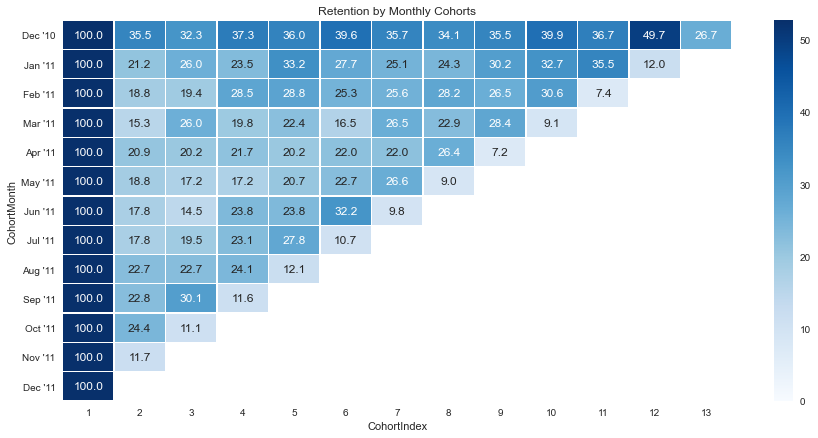

In [106]:
grouping = df_uk.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

cohort_sizes = cohort_counts.iloc[:,0]

retention = cohort_counts.divide(cohort_sizes, axis=0)*100

month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]


plt.figure(figsize=(15,7))


plt.title('Retention by Monthly Cohorts')

sns.heatmap(data=retention,
            annot = True,
            cmap = "Blues",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show();

## Create the 2nd Cohort: Average Quantity Sold

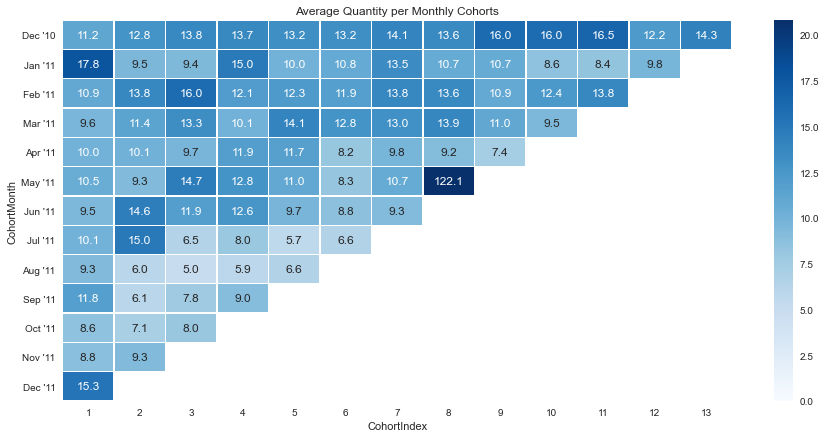

In [107]:
grouping = df_uk.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the Quantity column
cohort_data = grouping['Quantity'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')

# Initialize plot figure
plt.figure(figsize=(15, 7))

# Add a title
plt.title('Average Quantity per Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = average_quantity,
            annot=True,
            vmin = 0.0,
            cmap='Blues',
            vmax = list(average_quantity.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
plt.show();

## Create the 3rd Cohort: Average Sales


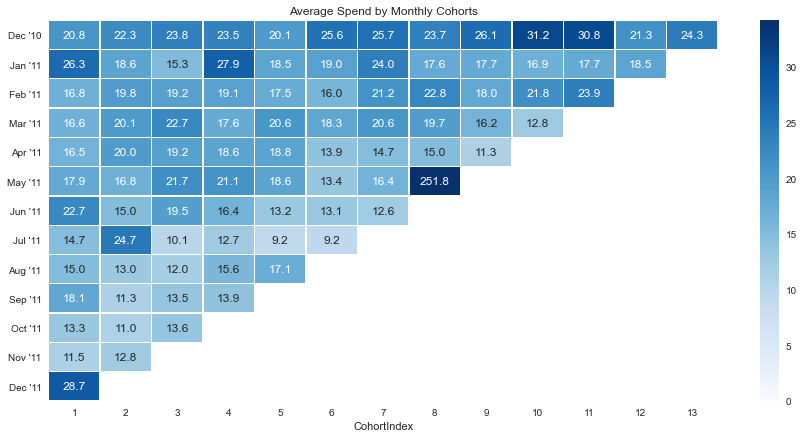

In [108]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = df_uk.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['TotalPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='TotalPrice')
average_price.round(1)
average_price.index = average_price.index.date

# Initialize plot figure
plt.figure(figsize=(15, 7))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = average_price,
            annot=True,
            vmin = 0.0,

            cmap='Blues',
            vmax = list(average_price.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
plt.show();

In [109]:
df_uk[(df_uk['CohortMonth'] == '2011-05-01') & (df_uk['InvoiceMonth'] =='2011-12-01')].agg({'TotalPrice': 'mean'})

TotalPrice   252
dtype: float64

In [110]:
df_uk[(df_uk['CohortMonth'] == '2010-12-01') & (df_uk['InvoiceMonth'] =='2011-09-01')].agg({'TotalPrice': 'mean'})

TotalPrice   31
dtype: float64

In [111]:
df_uk[(df_uk['CohortMonth'] == '2011-05-01') & (df_uk['InvoiceMonth'] =='2011-12-01')][['Description', 'TotalPrice']].value_counts()

Description                       TotalPrice
SET OF 3 WOODEN TREE DECORATIONS  1             3
VICTORIAN GLASS HANGING T-LIGHT   94            3
BAKING SET 9 PIECE RETROSPOT      15            3
AIRLINE BAG VINTAGE JET SET RED   8             3
ALARM CLOCK BAKELIKE RED          15            3
                                               ..
GLASS  SONGBIRD STORAGE JAR       12            1
GLITTER CHRISTMAS STAR            1             1
GLITTER HEART DECORATION          1             1
GOLD MUG BONE CHINA TREE OF LIFE  1             1
ZINC WILLIE WINKIE  CANDLE STICK  20            1
Length: 644, dtype: int64

For e-commerce organisations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get answers to following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employed to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasoanlity pattern in Customer behahiour?


**it is interesting that in term of customers who came to our company on Dec, 2010, we managed to keep almost half of them over the one year period.**

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___